# When to use machine learning
Machine learning can be effectively used when you need to predict some data variable based on other data you already know. It can also be very effective when you need to train a program to effectively perform a task. Machine learning can be used to discover what the most effective route is. It's very strong when the data it inputs is properly sorted and ranked in importance accurately. The correlation is known between the two datasets will provide more accurate data. Machine learning is much more effective when the rules of the task your trying to accomplish are more than black and white. When it isn't simple to code an algorithm that can consitently sort things machine learning can be more effective. Machine learning is also very useful when the data is hard to scale. When the amount of data is extremely high machine learning is much more useful as more training can be done and so more accurate results occur. It's just critical that the data is sorted in a correct way where machine learning can be used. It's also extremely important to know which type of machine learning to use otherwise the results provided can be fairly inaccurate. Machine learning can also sometimes put out data that isn't extremely interpetable. Sometimes the data that's spit out doesn't quite make sense in the scenario. Machine learning overall can be an extremely useful tool it's just important that it's used accuratey by the user.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

titanic_df = pd.read_csv("titanic.csv")
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
titanic_df.head()
titanic_df['Sex'] = np.where(titanic_df['Sex'] == 'male',0,np.where(titanic_df['Sex'] == 'female',1,2))
titanic_df['Ticket'] = pd.to_numeric(titanic_df['Ticket'], errors ='coerce', downcast='integer')
#Takes any numbers in the ticket and makes it into integer
titanic_df['Cabin'] = pd.to_numeric(titanic_df['Cabin'], errors ='coerce', downcast='integer')
titanic_df['Embarked'] = np.where(titanic_df['Embarked'] == 'Q',0.0,np.where(titanic_df['Embarked'] == 'S',1.0,np.where(titanic_df['Embarked'] == 'C',2.0,3.0)))
titanic_df['Name'] = pd.to_numeric(titanic_df['Name'], errors ='coerce', downcast='integer')
titanic_df['Embarked'] = pd.to_numeric(titanic_df['Embarked'], errors ='coerce', downcast='integer')
#Makes name nan as name has no use in the data as a value.
titanic_df['Embarked'].dtype
titanic_df['Survived'] = titanic_df['Survived'].fillna(0)
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [41]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,NaN,0,22.0,1,0,NaN,7.2500,NaN,1
1,2,1,1,NaN,1,38.0,1,0,NaN,71.2833,NaN,2
2,3,1,3,NaN,1,26.0,0,0,NaN,7.9250,NaN,1
3,4,1,1,NaN,1,35.0,1,0,113803.0,53.1000,NaN,1
4,5,0,3,NaN,0,35.0,0,0,373450.0,8.0500,NaN,1


<Axes: >

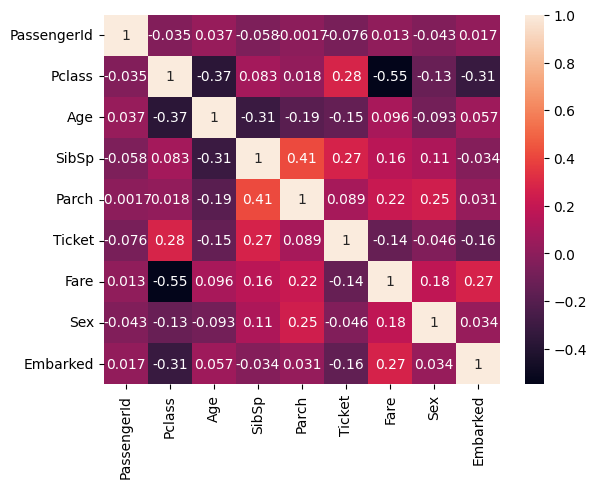

In [42]:
titanic_df.head(50)
correlation_df = titanic_df[['PassengerId','Pclass','Age','SibSp','Parch','Ticket','Fare','Sex','Embarked']]
correlation = correlation_df.corr()
sns.heatmap(correlation, annot = True)


# Takeaways
There is very little correlation between most things except for passenger class and age, fare and passenger class also have a fairly high correlation. It also seems as age goes up the fare goes up but passenger class goes down. Another thing I noticed is even if I set Embarked and Sex as float variables they still don't work on the correlation map. I'm not sure why the data I interferred with using np where doesn't work on the correlation map. Mostly all the data seems to be fairly uncorrelated. 

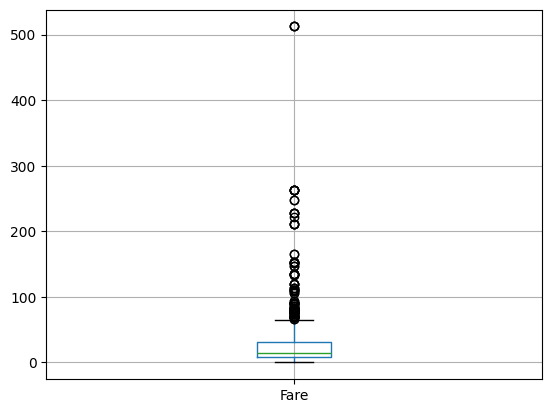

In [16]:
boxplot = titanic_df.boxplot(column = 'Fare', return_type = 'axes')

In [17]:
age_bin

NameError: name 'age_bin' is not defined

In [226]:
# The fare is heavily skewed right or towards larger values, it would be wise to make the null values equivalent to the median not the mean because the data is so skewed. 
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].median())
age_bin = titanic_df['Age'].tolist()
for x in range(len(age_bin)-1):
    if age_bin[x] < 20:
        age_bin[x] = '0-20'
    elif age_bin[x] < 40:
        age_bin[x] = '20-40'
    elif age_bin[x] < 60: 
        age_bin[x] = '40-60'
    elif age_bin[x] < 80:
        age_bin[x] = '60-80'
    else :
        age_bin[x] = '80+NA'

titanic_df['age_bin'] = age_bin
titanic_df.groupby(titanic_df['age_bin']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
age_bin,,,,,,,,,,,
0-20,61,61,0,61,61,61,61,41,61,0,61
20-40,189,189,0,189,189,189,189,136,189,0,189
40-60,68,68,0,68,68,68,68,45,68,0,68
60-80,14,14,0,14,14,14,14,10,14,0,14
80+NA,85,85,0,85,0,85,85,63,85,0,85


array([[<Axes: title={'center': '0-20'}>,
        <Axes: title={'center': '20-40'}>],
       [<Axes: title={'center': '40-60'}>,
        <Axes: title={'center': '60-80'}>],
       [<Axes: title={'center': '80+NA'}>, <Axes: >]], dtype=object)

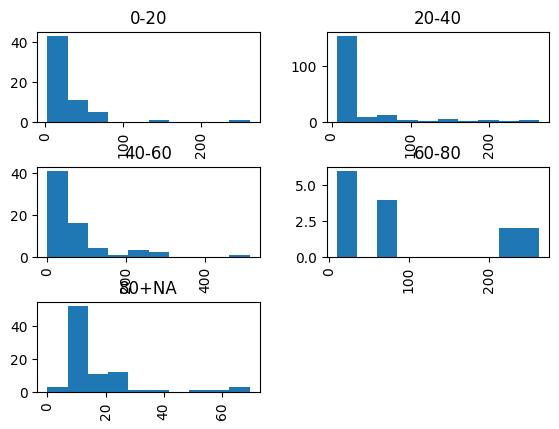

In [227]:
titanic_df.hist('Fare', by='age_bin')

 People between the ages of 0 and 40 tended to have very similar fare prices, however people aged 20-40 had a few more extremes. As you got older the fare prices went up and there was slightly less data to be used. The most people exist between the ages of 20 and 40. People from 40 to 60 had the largest range of fares being between 0 and 300 excluding outliers. The null data was the most spreadout as people of all ages could've been included considering the data was null.  

In [56]:
# When using knn and logistic regression with the diabetes data set logistic regression performed slightly better
# I believe the two datasets are similiar when it comes to how many variables and how correlated the different variables are
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = titanic_df.drop('Survived',axis = 1).drop('Name',axis = 1).drop('Cabin',axis = 1).drop('Ticket',axis=1).drop('PassengerId',axis=1)
y = titanic_df['Survived']

# split the data into training and test set
#Stratification can be (but is not always) quite helpful
# it tries to split the test data into groups that represent the data well 
# instead of randomly selecting from the full set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)
# Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



In [58]:
regression = LogisticRegression(random_state = 32).fit(X_train, y_train)
y_prediction = regression.predict(X_test)

In [59]:
regression.score(X_test, y_test)

0.7653631284916201

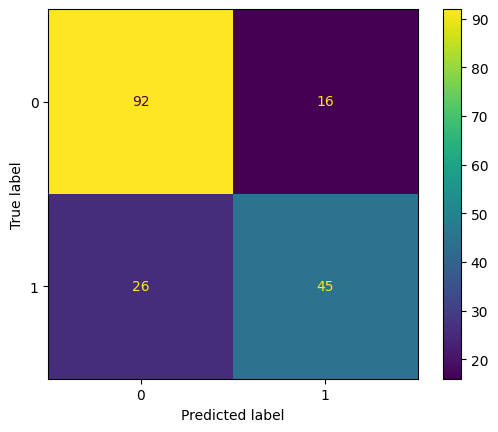

In [61]:
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_prediction)
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)